In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np

In [2]:
resultados = pd.read_csv('resultados/tiempos.csv')

In [3]:
resultados['Procesos'].unique()

array([ 1,  2,  3,  4,  6,  8, 16, 32])

In [4]:
resultados_con_un_proceso = resultados[resultados['Procesos']==1]

In [5]:
resultados_con_un_proceso

,Procesos,Individuos,Posiciones,Repeticiones,Tiempo Promedio,Tiempo Promedio std,Tiempo Promedio Calcular Frecuencias,Tiempo Promedio Calcular Frecuencias std,Tiempo Promedio Calcular Hoplotipo,Tiempo Promedio Calcular Hoplotipo std
0,1,500,4,10,0.112328,0.010174,0.021739,0.006685,0.054202,0.005438
1,1,500,6,10,0.255522,0.012052,0.064117,0.007405,0.155115,0.006822
2,1,500,8,10,0.829224,0.005945,0.211483,0.003411,0.580978,0.005851
3,1,500,10,10,3.257391,0.008873,0.847512,0.001591,2.373798,0.008341
4,1,500,12,10,13.253765,0.047509,3.499833,0.020109,9.716061,0.032465
5,1,1000,4,10,0.165018,0.003846,0.033429,0.003027,0.081027,0.001856
6,1,1000,6,10,0.448068,0.004928,0.109895,0.004188,0.287798,0.002040
7,1,1000,8,10,1.620645,0.004646,0.416388,0.003420,1.152840,0.003671
8,1,1000,10,10,6.516783,0.088510,1.693300,0.003097,4.771831,0.089368
9,1,1000,12,10,26.639941,0.042822,7.003664,0.010945,19.584711,0.041537


In [6]:
speed_up= []
speed_up_frecuencias = []
speed_up_haplo = []
for p in resultados['Procesos'].unique():
    resultados_con_p_proceso = resultados[resultados['Procesos']==p]
    speed_up_p_proceso = resultados_con_un_proceso['Tiempo Promedio'].to_numpy() / resultados_con_p_proceso['Tiempo Promedio'].to_numpy()
    speed_up_p_proceso_frecuencias = resultados_con_un_proceso['Tiempo Promedio Calcular Frecuencias'].to_numpy() / resultados_con_p_proceso['Tiempo Promedio Calcular Frecuencias'].to_numpy()
    speed_up_p_proceso_haplo = resultados_con_un_proceso['Tiempo Promedio Calcular Hoplotipo'].to_numpy() / resultados_con_p_proceso['Tiempo Promedio Calcular Hoplotipo'].to_numpy()
    
    speed_up+=speed_up_p_proceso.tolist()
    speed_up_frecuencias+=speed_up_p_proceso_frecuencias.tolist()
    speed_up_haplo+=speed_up_p_proceso_haplo.tolist()

In [7]:
resultados['speed_up_total'] = speed_up
resultados['speed_up_frecuencias'] = speed_up_frecuencias
resultados['speed_up_haplo'] = speed_up_haplo

resultados['eficiencia_total'] = (resultados['speed_up_total'].to_numpy() / resultados['Procesos'].to_numpy() ) * 100
resultados['eficiencia_frecuencias'] = (resultados['speed_up_frecuencias'].to_numpy() / resultados['Procesos'].to_numpy()  ) * 100
resultados['eficiencia_haplo'] = (resultados['speed_up_haplo'].to_numpy() / resultados['Procesos'].to_numpy()  ) * 100

In [8]:
resultados.to_csv('resultados/tiempos_speedup.csv', index=False)

In [9]:
resultados.columns

Index(['Procesos', 'Individuos', 'Posiciones', 'Repeticiones',
       'Tiempo Promedio', 'Tiempo Promedio std',
       'Tiempo Promedio Calcular Frecuencias',
       'Tiempo Promedio Calcular Frecuencias std',
       'Tiempo Promedio Calcular Hoplotipo',
       'Tiempo Promedio Calcular Hoplotipo std', 'speed_up_total',
       'speed_up_frecuencias', 'speed_up_haplo', 'eficiencia_total',
       'eficiencia_frecuencias', 'eficiencia_haplo'],
      dtype='object')

In [10]:
resultados[resultados['Individuos'] == 3000][['Posiciones', 'Procesos',
       'Tiempo Promedio',
       'speed_up_total', 'eficiencia_total']].to_excel('resultado3000.xlsx')

In [11]:
def plot_problema_con_columna_fijas(x, y , columna='Posiciones',pos=4, style='Individuos', titulo='Speedup del Script'):
    df = resultados[resultados[columna]==pos]
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=style,
        style=style,
        marker='o',
        markersize=8
    )
    plt.plot([1, df['Procesos'].max()], [1, df['Procesos'].max()], 'k--', label='Speedup Ideal')
    title = '{} con {} {}'.format(titulo, int(df[columna].mean()), columna)
    plt.title(title, fontsize=16)
    plt.xlabel('Número de Procesos', fontsize=12)
    plt.ylabel('Speedup (T_base / T_N)', fontsize=12)
    plt.legend(title=f'Tamaño del Problema ({style})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(sorted(df['Procesos'].unique()))
    plt.yticks(np.arange(1, df['Procesos'].max() + 1, 1))
    plt.tight_layout()
    file = title.replace(' ', '_')
    plt.savefig(f'resultados/fig/{file}.png', dpi=300)
    
def plot_problema_eficiencia_con_columna_fijas(x, y , columna='Posiciones',pos=4, style='Individuos', titulo='Eficiencia del Script'):
    df = resultados[resultados[columna]==pos]
    
    orden_eje_x = sorted(df[x].unique())
    df[x] = df[x].astype(str)
    orden_eje_x = [str(i) for i in orden_eje_x]
    
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x=x,
        y=y,
        hue=style,
        edgecolor='black',
        linewidth=1,
        order=orden_eje_x,
        #palette='viridis'
    )

    
    title = '{} con {} {}'.format(titulo, int(df[columna].mean()), columna)

    plt.title(title, fontsize=16)
    plt.xlabel('Número de Procesos', fontsize=12)
    plt.ylabel('Eficiencia (Speedup / N)', fontsize=12)
    plt.legend(title=f'Tam. Prob. ({style})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(sorted(df['Procesos'].unique()))
    plt.tight_layout()
    file = title.replace(' ', '_')
    plt.savefig(f'resultados/fig/{file}.png', dpi=300)



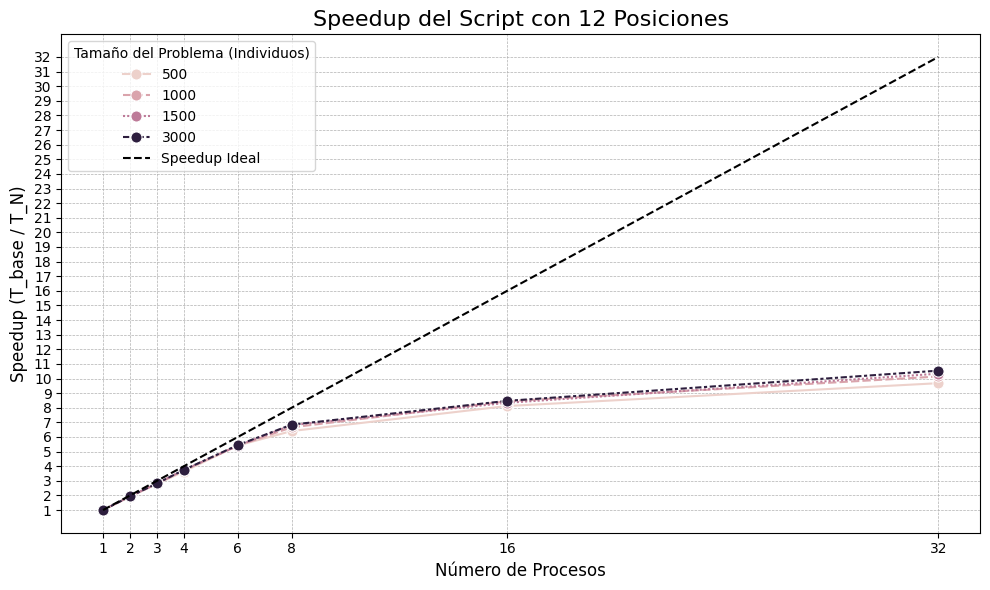

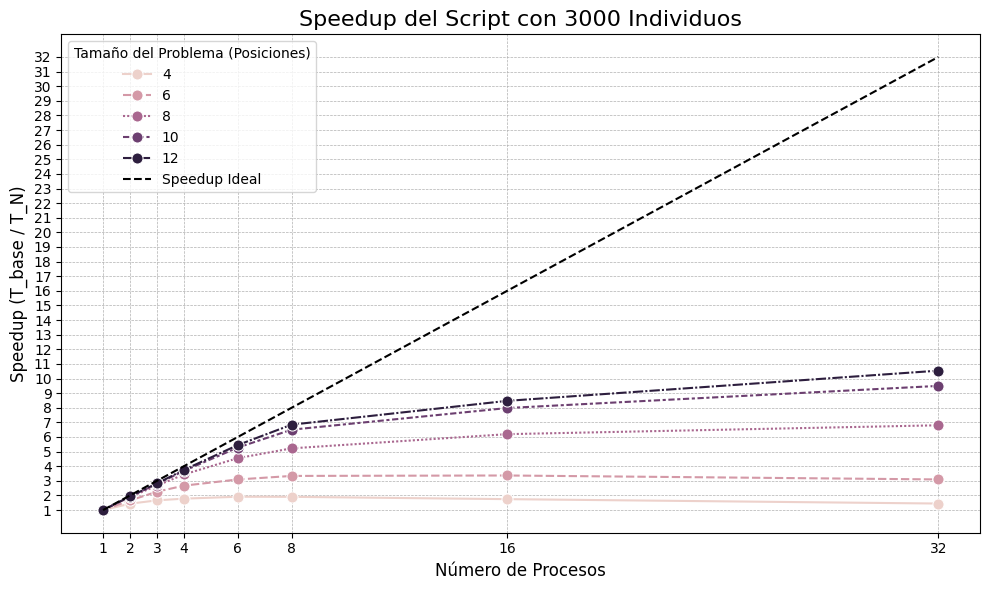

In [12]:
for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_total', 
                                    columna='Posiciones', 
                                    pos=p, 
                                    style='Individuos')
    break

for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_total', 
                                    columna='Individuos', 
                                    pos=p, 
                                    style='Posiciones')
    break

/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)
/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)


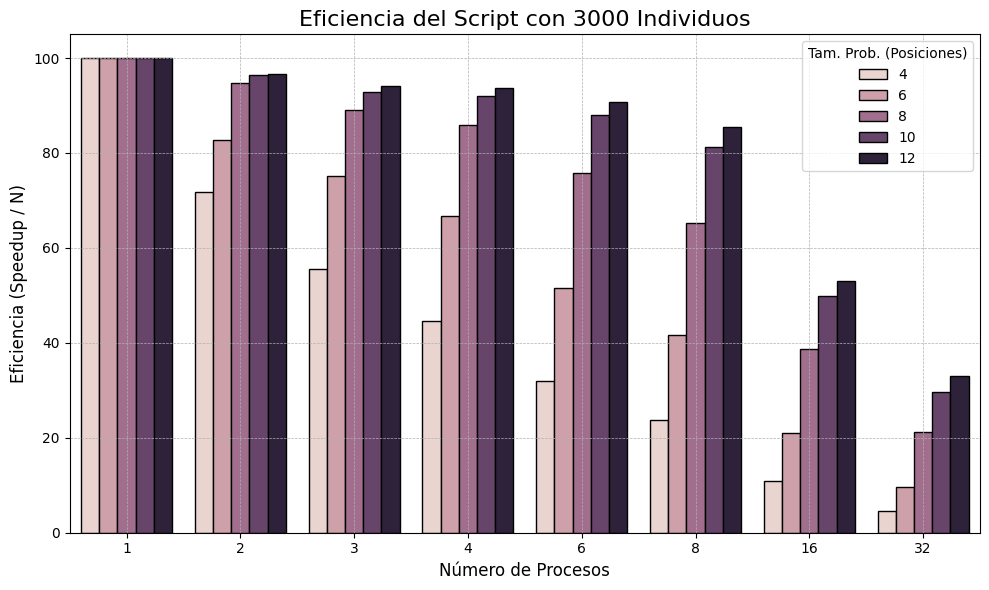

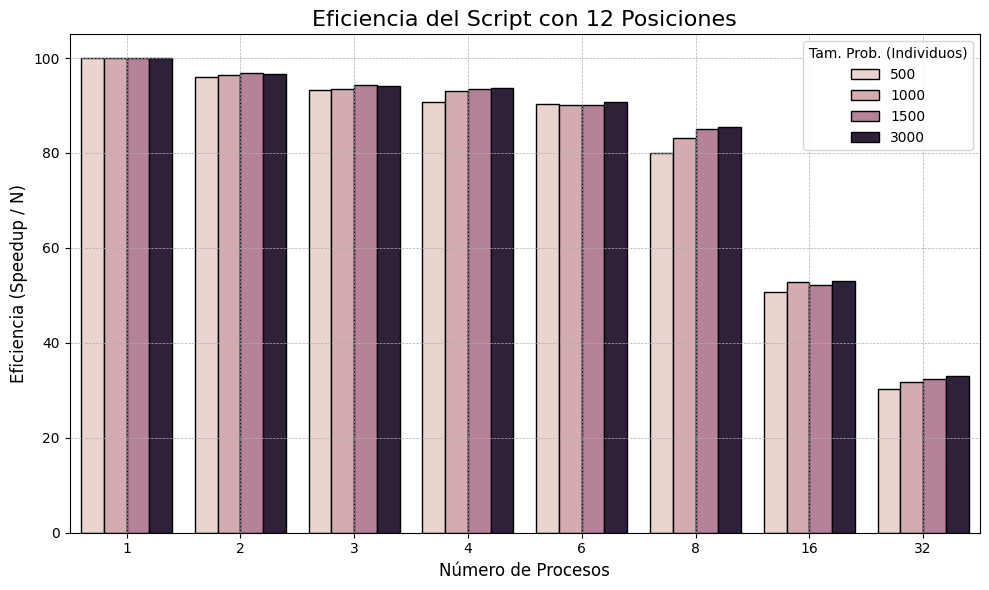

In [13]:
for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_total', 
                                               columna='Individuos', 
                                               pos=p, 
                                               style='Posiciones')
    break

for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_total', 
                                               columna='Posiciones', 
                                               pos=p, 
                                               style='Individuos')
    break

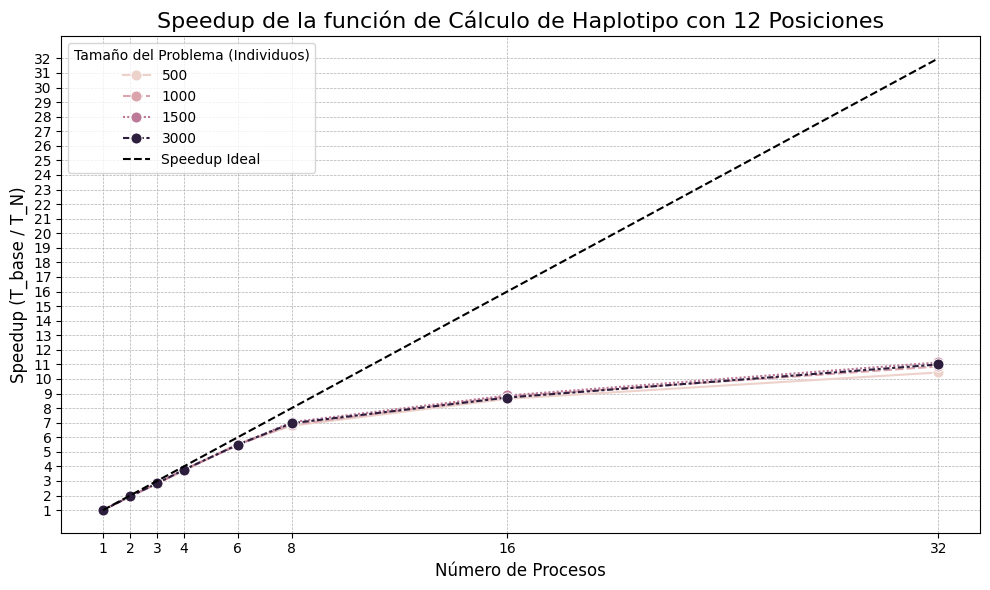

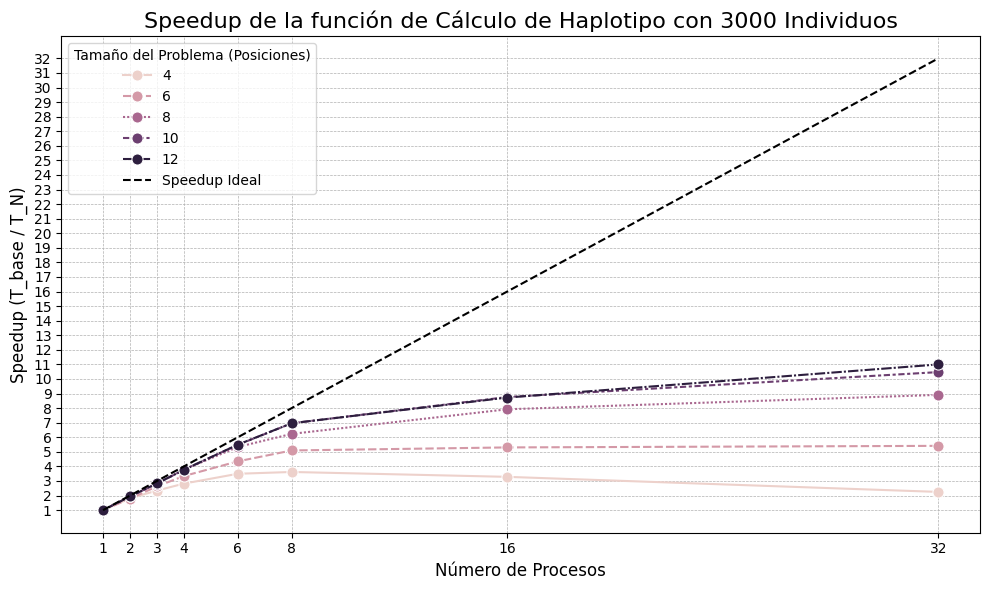

In [14]:
for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_haplo', 
                                    columna='Posiciones', 
                                    pos=p, 
                                    style='Individuos',
                                    titulo='Speedup de la función de Cálculo de Haplotipo')
    break

for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_haplo', 
                                    columna='Individuos', 
                                    pos=p, 
                                    style='Posiciones',
                                    titulo='Speedup de la función de Cálculo de Haplotipo')
    break

/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)
/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)


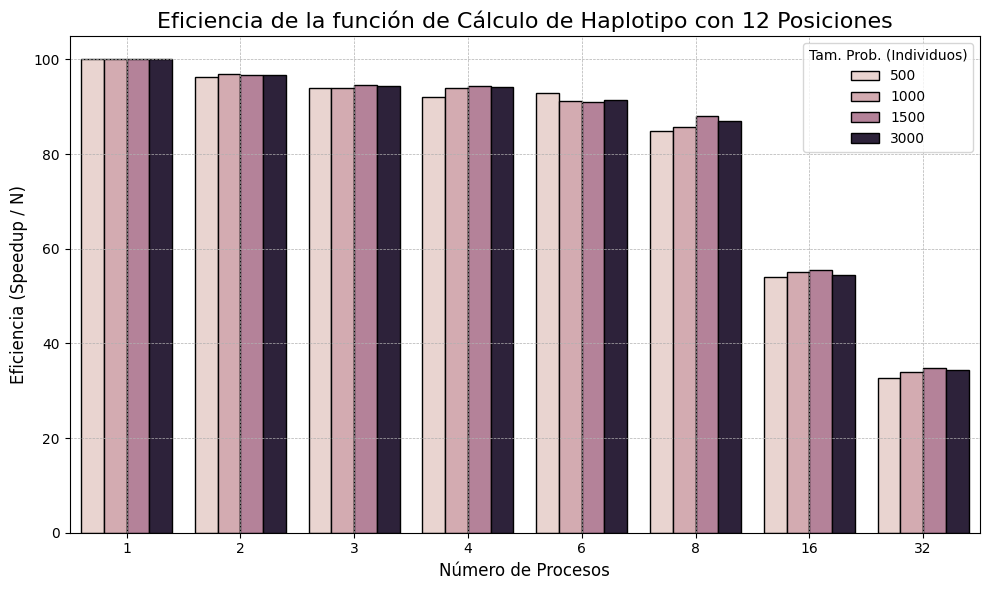

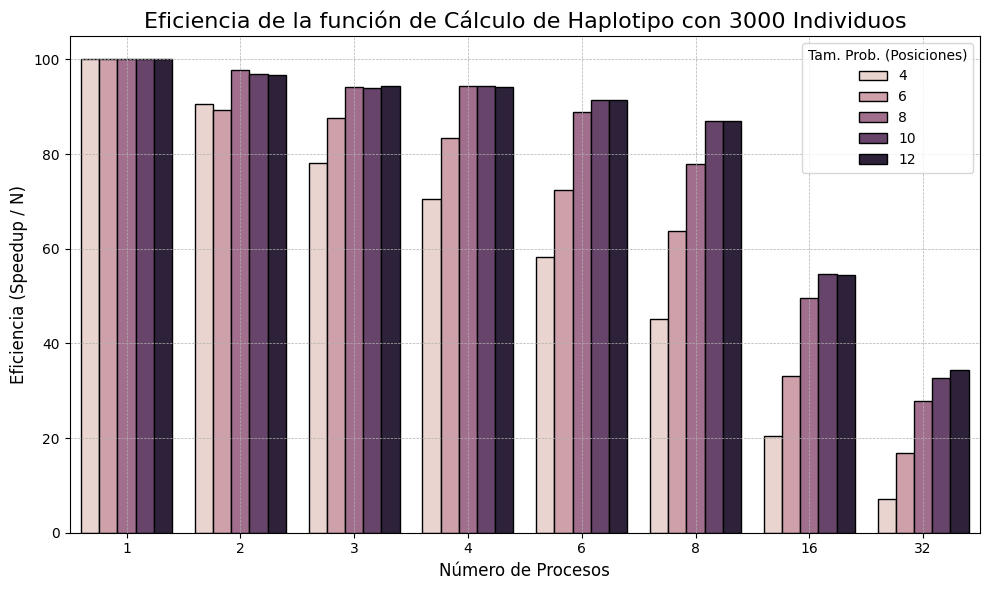

In [15]:
for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_haplo', 
                                               columna='Posiciones', 
                                               pos=p, 
                                               style='Individuos', 
                                               titulo='Eficiencia de la función de Cálculo de Haplotipo')
    break

for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_haplo', 
                                               columna='Individuos', 
                                               pos=p, 
                                               style='Posiciones', 
                                               titulo='Eficiencia de la función de Cálculo de Haplotipo')

    break

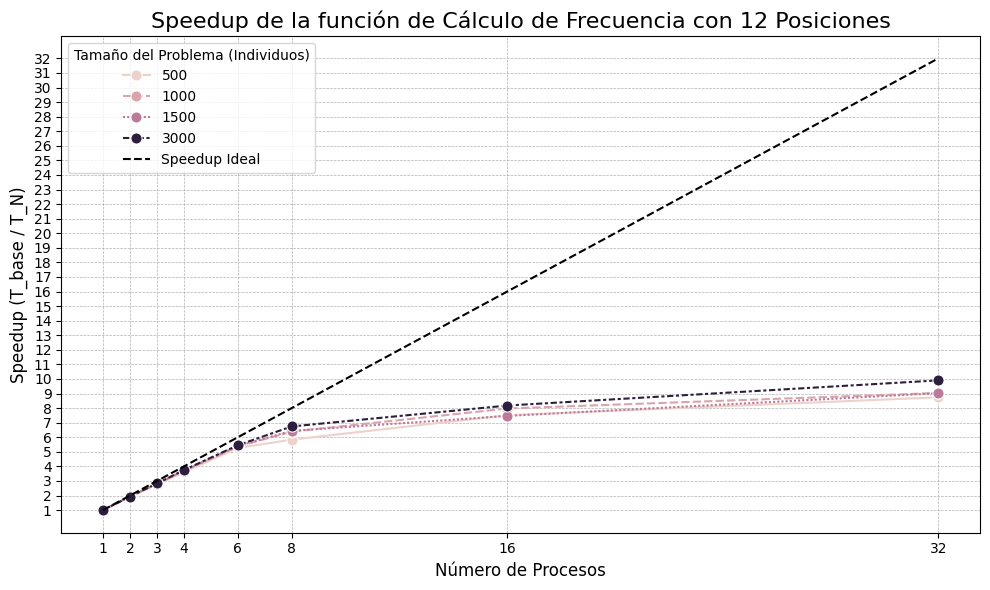

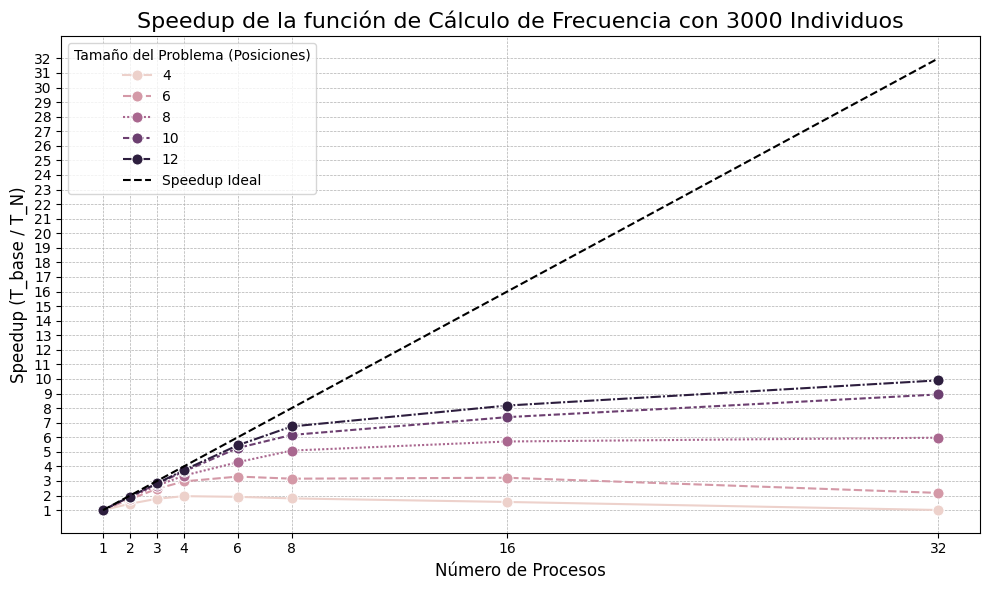

In [16]:
for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_frecuencias', 
                                    columna='Posiciones', 
                                    pos=p, 
                                    style='Individuos',
                                    titulo='Speedup de la función de Cálculo de Frecuencia')
    break

for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_con_columna_fijas(x='Procesos', 
                                    y='speed_up_frecuencias', 
                                    columna='Individuos', 
                                    pos=p, 
                                    style='Posiciones',
                                    titulo='Speedup de la función de Cálculo de Frecuencia')
    break

/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)
/tmp/ipykernel_903113/3357962747.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype(str)


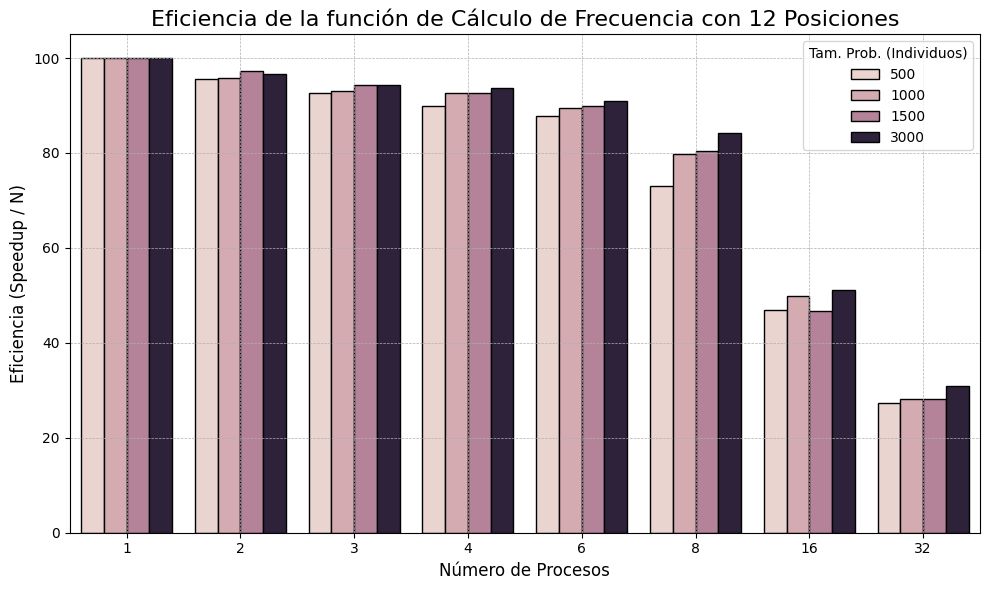

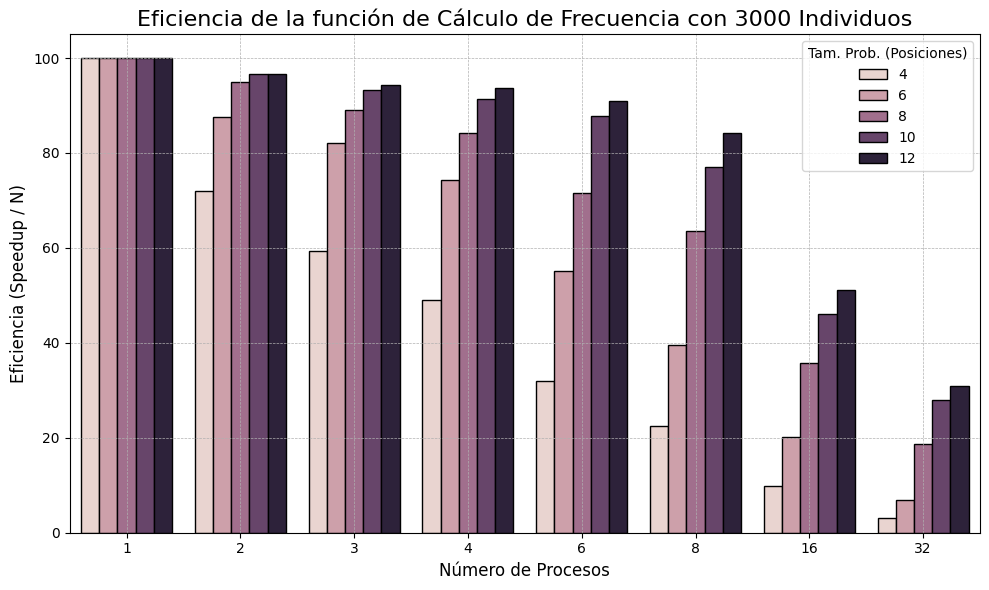

In [17]:
for p in resultados['Posiciones'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_frecuencias', 
                                               columna='Posiciones', 
                                               pos=p, 
                                               style='Individuos', 
                                               titulo='Eficiencia de la función de Cálculo de Frecuencia')
    break

for p in resultados['Individuos'].unique()[::-1]:
    plot_problema_eficiencia_con_columna_fijas(x='Procesos', 
                                               y='eficiencia_frecuencias', 
                                               columna='Individuos', 
                                               pos=p, 
                                               style='Posiciones', 
                                               titulo='Eficiencia de la función de Cálculo de Frecuencia')

    break